In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA

n = 10101
head = ['id', 'sex', 'population'] + list(range(n))


In [2]:
dataset = pd.read_csv("dataset.txt", delimiter=' ', header=None, names=head)
mode_nucleobase = dataset.mode(axis=0, numeric_only=False).iloc[:1, 3:].values.tolist()[0]

In [3]:
matrix = np.array([
        [int(row[j] != mode) for j, mode in enumerate(mode_nucleobase)] for i, row in dataset.iterrows()]
)
        

In [47]:
pca = PCA(n_components=3)
pca.fit(matrix)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

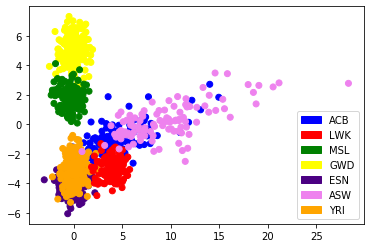

In [89]:
x = np.dot(matrix, pca.components_[0])
y = np.dot(matrix, pca.components_[1])
populations = list(set(dataset['population']))
colors_list = ['blue', 'red', 'green', 'yellow', 'indigo', 'violet', 'orange']
colors = {key: value for key, value in zip(populations, colors_list)}
scatter = plt.scatter(x, y, c=dataset['population'].map(colors))
handles=[mpatches.Patch(color=c, label=l) for c, l in zip(colors_list, populations)]
plt.legend(handles=handles)
plt.show()

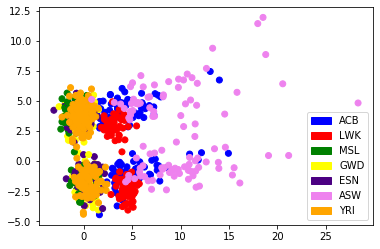

In [91]:
z = np.dot(matrix, pca.components_[2])
scatter = plt.scatter(x, z, c=dataset['population'].map(colors))
plt.legend(handles=handles)
plt.show()

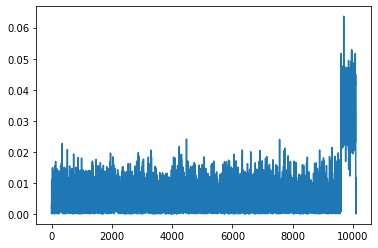

In [72]:
plt.plot(np.arange(n), list(map(abs, pca.components_[2])))
plt.show()